<a href="https://colab.research.google.com/github/villemarc1/novoreposit/blob/main/FIAP_21IA_TRabalho_RPA_Spermercado_Pao_de_Acucar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho RPA FIAP - Turma 21Ia
Marcio de Paiva Villela

RM: 340601

# Dados a serem analizados

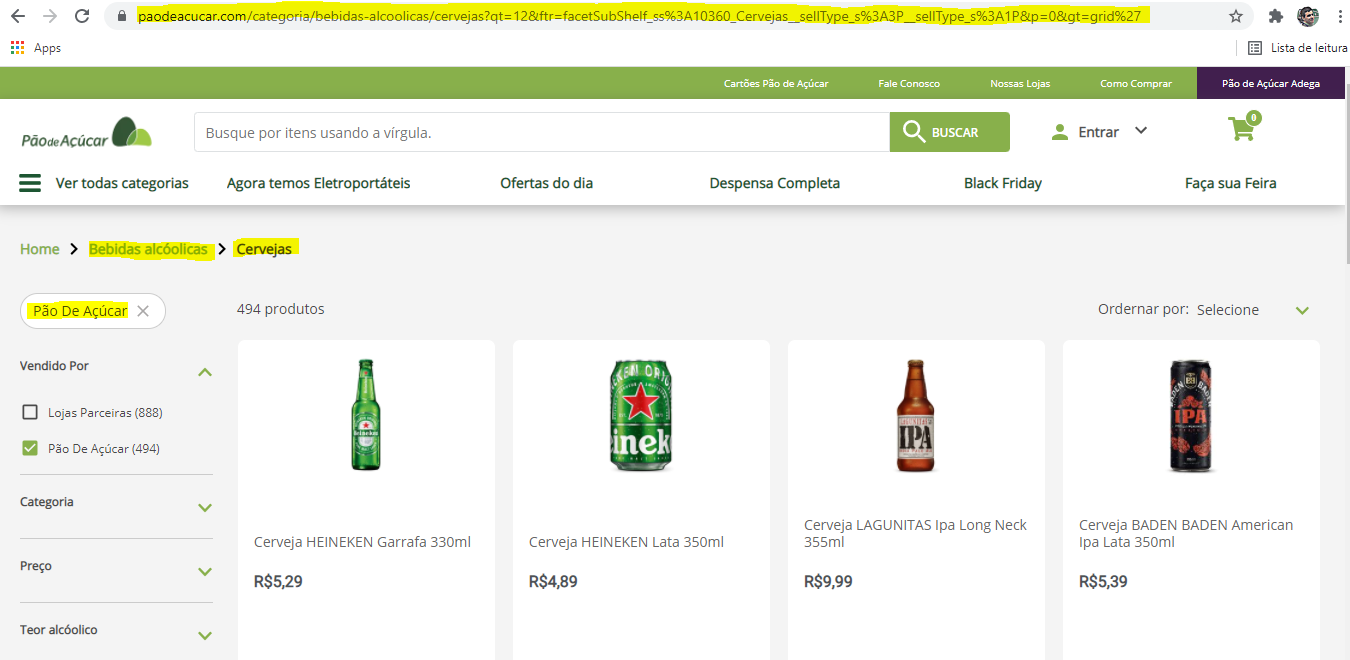

# Pao de acucar cervejas
https://www.paodeacucar.com/categoria/bebidas-alcoolicas/cervejas?qt=12&ftr=facetSubShelf_ss%3A10360_Cervejas__sellType_s%3A3P__sellType_s%3A1P&p=0&gt=grid'


#Instalar Bibliotecas para automatizacão e navegação no Chrome

In [24]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/graph

# Carregar as bibliotecas para fazer as pesquisas e tratativas dos dados e gerar planilha final no excel.

In [25]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from time import sleep
import pandas as pd



In [26]:
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.common.action_chains import ActionChains

# Defini opçoes para o Chrome

In [27]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # nao mostra o navegador . no colab preciso deixar assim senao nao roda
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--user-agent=whatever you want')
# Instacia o navegador do Chrome como "navegador"
navegador = webdriver.Chrome(options =chrome_options)

# Faz a Leitura do site do Pao de Açucar e navega pela tela , descendo a tela varias vezes (100 iteraçoes de scrollby).

In [28]:


link='https://www.paodeacucar.com/categoria/bebidas-alcoolicas/cervejas?qt=12&ftr=facetSubShelf_ss%3A10360_Cervejas__sellType_s%3A3P__sellType_s%3A1P&p=0&gt=grid'
navegador.get(link)
actions = ActionChains(navegador) 
for _ in range(100):    
   navegador.execute_script("window.scrollBy(0, 1500)")  # navega pela pagina para carregar dados dinamicamente.
   #   navegador.execute_script("window.scrollBy(0, 700)")  # navega pela pagina para carregar dados dinamicamente.   
   #   se nao for rodar no colab mudar scrollby para 700   e sleep(4)
   sleep(8)  
 


# Apos itens carregados do site na tela faz carga dos dados HTML na variavel "Site_HTML".

In [29]:
site_html =  BeautifulSoup(navegador.page_source,'html.parser')    # Como objto BeautifilSoupo   

# inicia a busca das Tags HTML para achar as posições onde os dados se encontram.

In [30]:
Cervejas_PaoDeAcucar = []

# Captura as DIVs HTML onde os dados das cervejas se encontram ( Nome ,foto , preço e link para efeitivar a compra)
ofertas = site_html.find_all('div',attrs=('product-cardstyles__CardStyled-sc-1uwpde0-0 bTCFJV cardstyles__Card-yvvqkp-0 grtyhB'))
tot_cervejas = 0
tot = 0
#  Loop para tratar as informaçoes de cada cerveja selecionada
for x in ofertas:
  # IF para excluir as cervejas que não estão disponiveis e sem preçoes .
  if x.find('div',{'class':'price-tag-normalstyle__LabelPrice-sc-1co9fex-0 lkWvql'}) !=  None:  
    ofertas_foto = x.find('img' ) # carrega  o link da imagem da cerveja . Obs não esta sendo gravado na planilha final
    # carrega informação do produto (link) para ser usado na compra do produto.--------------------------------------------
    link = x.find('a',{'class':'hyperlinkstyles__Link-j02w35-0 bCRCCt'})
    link2=str(link)
    Href_ini = link2.find('href')+6
    Href_fim = link2.find('><div')-1
    Link_produto = "https://www.paodeacucar.com/"+link2[Href_ini:Href_fim]
    #-----------------------------------------------------------------------------------------------------------------------
    # carrega da DIV o texto onde se encontra o preço do produto
    preco = x.find('div',{'class':'price-tag-normalstyle__LabelPrice-sc-1co9fex-0 lkWvql'}).text
    # Grava uma lista com os dados:
    # ( [ofertas_foto['alt']  =  descrição da cerveja )
    # preço = preço da cerveja
    # Link_produto =  link para compra da cerveja
    Cervejas_PaoDeAcucar.append([ofertas_foto['alt'] , preco, Link_produto ] )
    tot_cervejas = tot_cervejas +1
  tot = tot+1
df_Cervejas_PaoDeAcucar = pd.DataFrame(Cervejas_PaoDeAcucar,columns=['Tipo Cerveja','Preço','Link Produto'])
print('total cervejas gravadas=', tot_cervejas , "contador = ", tot)


total cervejas gravadas= 303 contador =  494


In [31]:
# Classifica o DataFrame gerado pelo campo "Tipo Cerveja"
df_Cervejas_PaoDeAcucar.sort_values(by=['Tipo Cerveja'], inplace=True)
 

# Grava a planilha final - Excel com os dados das Cervejas capturadas 

In [32]:
df_Cervejas_PaoDeAcucar.to_excel('Cervejas GPA.xlsx',index=False)

In [33]:
navegador.close() #close browser
navegador.quit() #quit webdriver
